In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Call Option Simulation

In [3]:
S0 = 22000
K_call = 22500
premium_call = 150

ST = np.array([19800, 22000, 24200])
call_payoff = np.maximum(ST - K_call, 0) - premium_call

df_call = pd.DataFrame({
    'Scenario': ['Down', 'Flat', 'Up'],
    'S_T': ST,
    'Call Payoff': call_payoff
})
print("Call Option Payoff Table:")
print(df_call)

Call Option Payoff Table:
  Scenario    S_T  Call Payoff
0     Down  19800         -150
1     Flat  22000         -150
2       Up  24200         1550


# 2. Put Option Simulation

In [4]:
K_put = 21500
premium_put = 200

put_payoff = np.maximum(K_put - ST, 0) - premium_put

df_put = pd.DataFrame({
    'Scenario': ['Down', 'Flat', 'Up'],
    'S_T': ST,
    'Put Payoff': put_payoff
})
print("\nPut Option Payoff Table:")
print(df_put)


Put Option Payoff Table:
  Scenario    S_T  Put Payoff
0     Down  19800        1500
1     Flat  22000        -200
2       Up  24200        -200


# 3. Option Payoff Visualization

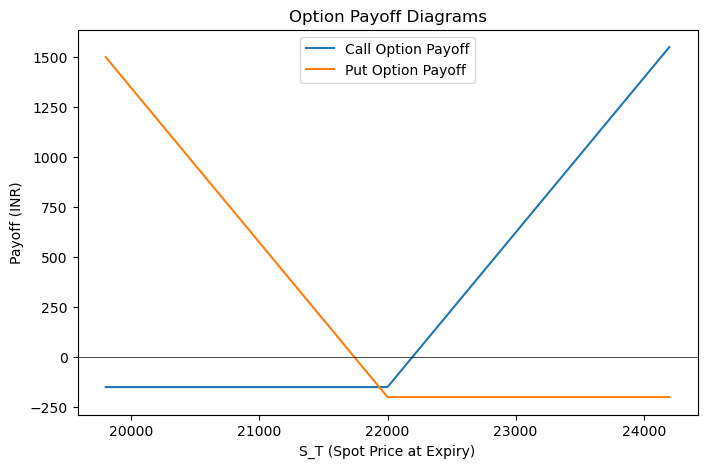

In [5]:
plt.figure(figsize=(8, 5))
plt.plot(ST, call_payoff, label='Call Option Payoff')
plt.plot(ST, put_payoff, label='Put Option Payoff')
plt.axhline(0, color='black', lw=0.5)
plt.title('Option Payoff Diagrams')
plt.xlabel('S_T (Spot Price at Expiry)')
plt.ylabel('Payoff (INR)')
plt.legend()
plt.show()

# 4. Protective Put Strategy

In [6]:
spot_change = ST - S0
protective_put_total = spot_change + np.maximum(K_put - ST, 0) - premium_put

df_protective = pd.DataFrame({
    'Scenario': ['Down', 'Flat', 'Up'],
    'S_T': ST,
    'Total Payoff': protective_put_total
})
print("\nProtective Put Payoff Table:")
print(df_protective)


Protective Put Payoff Table:
  Scenario    S_T  Total Payoff
0     Down  19800          -700
1     Flat  22000          -200
2       Up  24200          2000


# 5. Covered Call Strategy

In [7]:
covered_call_total = spot_change - np.maximum(ST - K_call, 0) + premium_call

df_covered = pd.DataFrame({
    'Scenario': ['Down', 'Flat', 'Up'],
    'S_T': ST,
    'Total Payoff': covered_call_total
})
print("\nCovered Call Payoff Table:")
print(df_covered)


Covered Call Payoff Table:
  Scenario    S_T  Total Payoff
0     Down  19800         -2050
1     Flat  22000           150
2       Up  24200           650


# 6. Combined Payoff Visualization

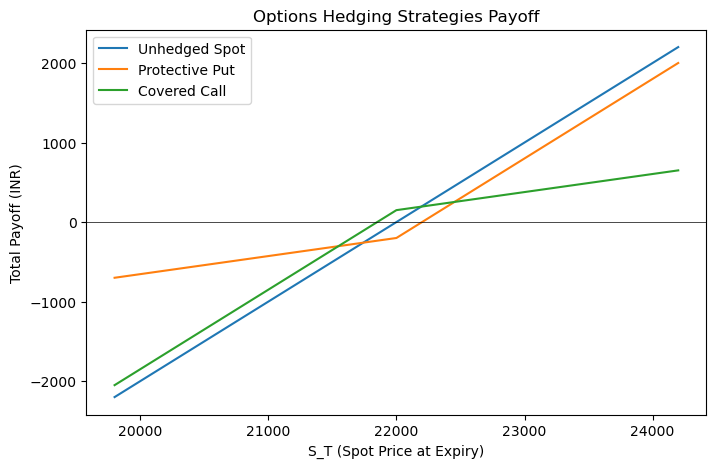

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(ST, spot_change, label='Unhedged Spot')
plt.plot(ST, protective_put_total, label='Protective Put')
plt.plot(ST, covered_call_total, label='Covered Call')
plt.axhline(0, color='black', lw=0.5)
plt.title('Options Hedging Strategies Payoff')
plt.xlabel('S_T (Spot Price at Expiry)')
plt.ylabel('Total Payoff (INR)')
plt.legend()
plt.show()